<a href="https://colab.research.google.com/github/KimYunGyu2/ai/blob/main/%EC%9D%8C%EC%9B%90%EC%B0%A8%ED%8A%B8%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 벅스 멜론 지니 네이버영화 크롤링

import requests                        # 파이썬으로 웹페이지 연결
from bs4 import BeautifulSoup as bs   # 분석을 용이하게 정제
import pandas                          # 데이터 분석 (엑셀로 저장, 데이터프레임) 

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [4]:
response = requests.get('https://www.naver.com/')

print(f'응답코드 : {response.status_code}')  # code 200 성공

응답코드 : 200



<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
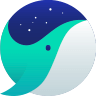
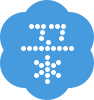

In [5]:
print(response.text)

In [6]:
response = requests.get('https://music.bugs.co.kr/chart')
response.text

'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n\t<!-- bgsweb-www904 -->\r\n\t<meta charset="utf-8">\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n\t<meta name="keywords" content="음악,음악 스트리밍,최신음악,인기가요,뮤직비디오,앨범,플레이어,mp3 다운로드,놀면뭐하니,유플래쉬,유플래시" />\r\n\r\n<script type="text/javascript">\r\n\tif(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/newRadio") >= 0 || location.href.indexOf("localhost") >= 0))\r\n\t\tdocument.domain = \'bugs.co.kr\';\r\n\r\n\tvar g_urlBase = "https://www.bugs.co.kr";\r\n\tvar g_urlWww = "https://www.bugs.co.kr";\r\n\tvar g_urlSecure = "https://secure.bugs.co.kr";\r\n\tvar g_urlMusic = "https://music.bugs.co.kr";\r\n\tvar g_urlMusicSecure = "https://music.bugs.co.kr";\r\n\tvar g_urlMember = "https://secure.bugs.co.kr/member";\r\n\tvar g_urlFile = "https://file.bugsm.co.kr/wbugs";\r\n\tvar g_urlFile_n ="https://file.bugsm.co.kr/nbugs"; \r\n\t//var g_urlSwf = "https://music.bugs.co.kr/swf";\r\n\tva

In [7]:
soup = bs(response.text)
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<!-- bgsweb-www904 -->
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="음악,음악 스트리밍,최신음악,인기가요,뮤직비디오,앨범,플레이어,mp3 다운로드,놀면뭐하니,유플래쉬,유플래시" name="keywords"/>
<script type="text/javascript">
	if(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/newRadio") >= 0 || location.href.indexOf("localhost") >= 0))
		document.domain = 'bugs.co.kr';

	var g_urlBase = "https://www.bugs.co.kr";
	var g_urlWww = "https://www.bugs.co.kr";
	var g_urlSecure = "https://secure.bugs.co.kr";
	var g_urlMusic = "https://music.bugs.co.kr";
	var g_urlMusicSecure = "https://music.bugs.co.kr";
	var g_urlMember = "https://secure.bugs.co.kr/member";
	var g_urlFile = "https://file.bugsm.co.kr/wbugs";
	var g_urlFile_n ="https://file.bugsm.co.kr/nbugs"; 
	//var g_urlSwf = "https://music.bugs.co.kr/swf";
	var g_urlSwf = "https://music.bugs.co.kr/swf";
	var g_urlJs = "/js";
	var g_urlMe = "http

In [8]:
len(soup.select('tr'))

104

In [9]:
len(soup.select('tbody > tr'))

103

In [10]:
len(soup.select('table > tbody > tr'))

103

In [11]:
len(soup.select('table.byChart > tbody > tr'))

100

In [12]:
songs = soup.select('table.byChart > tbody > tr')

In [13]:
song = songs[0]

In [14]:
len(song.select('p'))

3

In [15]:
song.select('p.artist > a')

[<a href="https://music.bugs.co.kr/artist/80026437?wl_ref=list_tr_10_chart" onclick="
 " title="태연 (TAEYEON)">태연 (TAEYEON)</a>]

In [16]:
song.select('p.artist > a')[0].text

'태연 (TAEYEON)'

In [17]:
song.select('p.title > a')

[<a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('32536942',true);
 " title="내 곁에">내 곁에</a>]

In [18]:
song.select('p.title > a')[0].text

'내 곁에'

In [19]:
import pandas as pd

In [20]:
song_data = []
rank = 1

songs = soup.select('table.byChart > tbody > tr')

for song in songs:
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    song_data.append(['Bugs', rank, title, singer])
    rank += 1
    
df = pd.DataFrame(song_data, columns = ['차트명','순위','타이틀','가수'])
df

,차트명,순위,타이틀,가수
0,Bugs,1,내 곁에,태연 (TAEYEON)
1,Bugs,2,That That (prod. & feat. SUGA of BTS),싸이 (PSY)
2,Bugs,3,LOVE DIVE,IVE (아이브)
3,Bugs,4,TOMBOY,(여자)아이들
4,Bugs,5,FEARLESS,LE SSERAFIM (르세라핌)
...,...,...,...,...
95,Bugs,96,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴(Paul Kim)
96,Bugs,97,SHUT DOWN,CLASS:y (클라씨)
97,Bugs,98,그대 돌아오면..,거미
98,Bugs,99,다시 사랑한다면,도원경


In [21]:
###############################################################
response = requests.get('https://www.genie.co.kr/chart/top200')
response.text

'<br>\r\n<br>\r\n<center>\r\n<img src="http://www.geniemusic.co.kr/images/common/logo_r1.png"><br>\r\n<h2> <meta http-equiv="Content-Type" content="text/html;charset=UTF-8"> ì\xa0\x91ì\x86\x8dì\x9a\x94ì²\xadì\x9d´ ë³´ì\x95\x88ì\xa0\x95ì±\x85ì\x97\x90 ì\x9d\x98í\x95´ ì°¨ë\x8b¨ë\x90\x98ì\x97\x88ì\x8aµë\x8b\x88ë\x8b¤. ë\x8b¹ì\x82¬ ê³\xa0ê°\x9dì\x84¼í\x84°ë¡\x9c ë¬¸ì\x9d\x98í\x95´ì£¼ì\x8b\xadì\x8b\x9cì\x98¤.<br><br>\r\nThe security policy of the connection request is blocked. Contact your customer service representative.<br><br>\r\nì§\x80ë\x8b\x88ë®¤ì§\x81 ê³\xa0ê°\x9dì\x84¼í\x84° 1577-5337<br><br>\r\n</h2>\r\n</center>\r\n<br>'

In [25]:
# 코랩에서 셀레니움 사용 방법

!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [27]:
driver = webdriver.Chrome('chromedriver', options=options)
driver.get('https://www.melon.com/chart/index.htm')

In [28]:
html = driver.page_source
soup = bs(html)

In [29]:
len(soup.select('tr'))

101

In [30]:
len(soup.select('tbody > tr'))

100

In [31]:
songs = soup.select('tbody > tr')
song = songs[0]

In [32]:
song.select('div.rank01 > span > a')

[<a href="javascript:melon.play.playSong('1000002721',34997078);" title="That That (prod. &amp; feat. SUGA of BTS) 재생">That That (prod. &amp; feat. SUGA of BTS)</a>]

In [33]:
song.select('div.rank01 > span > a')[0].text

'That That (prod. & feat. SUGA of BTS)'

In [34]:
song.select('div.rank02 > span > a')[0].text

'싸이 (PSY)'

In [36]:
song_data = []
rank = 1

songs = soup.select('tbody > tr')

for song in songs:
  title = song.select('div.rank01 > span > a')[0].text
  singer = song.select('div.rank02 > span > a')[0].text
  song_data.append(['Melon', rank, title, singer])
  rank += 1

df = pd.DataFrame(song_data, columns = ['차트명','순위','타이틀','가수'])
df.to_excel('melon.xlsx', index=False)

,차트명,순위,타이틀,가수
0,Melon,1,That That (prod. & feat. SUGA of BTS),싸이 (PSY)
1,Melon,2,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
2,Melon,3,LOVE DIVE,IVE (아이브)
3,Melon,4,TOMBOY,(여자)아이들
4,Melon,5,사랑인가 봐,멜로망스
...,...,...,...,...
95,Melon,96,Starlight,태일 (TAEIL)
96,Melon,97,Christmas Tree,V
97,Melon,98,서랍,10CM
98,Melon,99,Darl+ing,세븐틴


In [38]:
# 지니순위 1~100까지 크롤링 코드와 xlsx 파일 제출
response = requests.get('https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220509&hh=10&rtm=Y&pg=1')
response.text

'<br>\r\n<br>\r\n<center>\r\n<img src="http://www.geniemusic.co.kr/images/common/logo_r1.png"><br>\r\n<h2> <meta http-equiv="Content-Type" content="text/html;charset=UTF-8"> ì\xa0\x91ì\x86\x8dì\x9a\x94ì²\xadì\x9d´ ë³´ì\x95\x88ì\xa0\x95ì±\x85ì\x97\x90 ì\x9d\x98í\x95´ ì°¨ë\x8b¨ë\x90\x98ì\x97\x88ì\x8aµë\x8b\x88ë\x8b¤. ë\x8b¹ì\x82¬ ê³\xa0ê°\x9dì\x84¼í\x84°ë¡\x9c ë¬¸ì\x9d\x98í\x95´ì£¼ì\x8b\xadì\x8b\x9cì\x98¤.<br><br>\r\nThe security policy of the connection request is blocked. Contact your customer service representative.<br><br>\r\nì§\x80ë\x8b\x88ë®¤ì§\x81 ê³\xa0ê°\x9dì\x84¼í\x84° 1577-5337<br><br>\r\n</h2>\r\n</center>\r\n<br>'

In [37]:
driver = webdriver.Chrome('chromedriver', options=options)
driver.get('https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220509&hh=10&rtm=Y&pg=10')

In [39]:
html = driver.page_source
soup = bs(html)

In [40]:
len(soup.select('tr'))

51

In [65]:
len(soup.select('tr.list'))

50

In [66]:
songs = soup.select('tr.list')

In [67]:
song = songs[0]
song

<tr class="list" songid="96664100">
<td class="check"><input class="select-check" title="That That (Prod. &amp; Feat. SUGA of BTS)" type="checkbox"/></td>
<td class="number">1
                                        
                                    <span class="rank">
<span class="rank"><span class="rank-none"><span class="hide">유지</span></span></span>
</span>
</td>
<td><a class="cover" href="#" onclick="fnViewAlbumLayer('82662688');return false;"><span class="mask"></span><img alt="싸다9" onerror="this.src='//image.genie.co.kr/imageg/web/common/blank_68.gif';" src="//image.genie.co.kr/Y/IMAGE/IMG_ALBUM/082/662/688/82662688_1651196114166_1_140x140.JPG/dims/resize/Q_80,0"/></a></td>
<td class="link"><a class="btn-basic btn-info" href="#" onclick="fnViewSongInfo('96664100');return false;">곡 제목 정보 페이지</a></td>
<td class="info">
<a class="title ellipsis" href="#" onclick="fnPlaySong('96664100','1');return false;" title="재생">
                                        
                      

In [96]:
singer = songs[0].select('a.artist')[0].text.strip()
singer

'장범준'

In [69]:
title = songs[0].select('a.title')[0].text.strip()
title

'That That (Prod. & Feat. SUGA of BTS)'

In [72]:
song_data = []
rank = 1

songs = soup.select('tr.list')  # 50곡 전체

for song in songs:
    title = song.select('a.title')[0].text.strip()
    singer = song.select('a.artist')[0].text.strip()
    song_data.append(['Genie',rank, title, singer])
    rank += 1

df = pd.DataFrame(song_data, columns = ['차트명','순위','타이틀','가수'])
df

,차트명,순위,타이틀,가수
0,Genie,1,That That (Prod. & Feat. SUGA of BTS),싸이 (Psy)
1,Genie,2,LOVE DIVE,IVE (아이브)
2,Genie,3,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
3,Genie,4,TOMBOY,(여자)아이들
4,Genie,5,사랑인가 봐,멜로망스 (MeloMance)
5,Genie,6,Feel My Rhythm,Red Velvet (레드벨벳)
6,Genie,7,사랑은 늘 도망가,임영웅
7,Genie,8,우리들의 블루스,임영웅
8,Genie,9,LOVE me,BE'O (비오)
9,Genie,10,GANADARA (Feat. 아이유),박재범


In [74]:
import pandas as pd
df = pd.DataFrame(song_data, columns = ['차트명','순위','타이틀','가수'])

df.to_excel('Genie1~50.xlsx', index=False)

In [82]:
response = requests.get('https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220509&hh=10&rtm=Y&pg=2')
response.text

'<br>\r\n<br>\r\n<center>\r\n<img src="http://www.geniemusic.co.kr/images/common/logo_r1.png"><br>\r\n<h2> <meta http-equiv="Content-Type" content="text/html;charset=UTF-8"> ì\xa0\x91ì\x86\x8dì\x9a\x94ì²\xadì\x9d´ ë³´ì\x95\x88ì\xa0\x95ì±\x85ì\x97\x90 ì\x9d\x98í\x95´ ì°¨ë\x8b¨ë\x90\x98ì\x97\x88ì\x8aµë\x8b\x88ë\x8b¤. ë\x8b¹ì\x82¬ ê³\xa0ê°\x9dì\x84¼í\x84°ë¡\x9c ë¬¸ì\x9d\x98í\x95´ì£¼ì\x8b\xadì\x8b\x9cì\x98¤.<br><br>\r\nThe security policy of the connection request is blocked. Contact your customer service representative.<br><br>\r\nì§\x80ë\x8b\x88ë®¤ì§\x81 ê³\xa0ê°\x9dì\x84¼í\x84° 1577-5337<br><br>\r\n</h2>\r\n</center>\r\n<br>'

In [83]:
driver = webdriver.Chrome('chromedriver', options=options)
driver.get('https://www.genie.co.kr/chart/top200?ditc=D&ymd=20220509&hh=10&rtm=Y&pg=2')

In [84]:
html = driver.page_source
soup = bs(html)

In [85]:
len(soup.select('tr'))

51

In [86]:
len(soup.select('tr.list'))

50

In [87]:
songs = soup.select('tr.list')

In [88]:
song = songs[0]
song

<tr class="list" songid="89320910">
<td class="check"><input class="select-check" title="흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야" type="checkbox"/></td>
<td class="number">51
                                        
                                    <span class="rank">
<span class="rank"><span class="rank-up">14<span class="hide">상승</span></span></span>
</span>
</td>
<td><a class="cover" href="#" onclick="fnViewAlbumLayer('81260027');return false;"><span class="mask"></span><img alt="멜로가 체질 OST Part 3 (JTBC 금토 드라마)" onerror="this.src='//image.genie.co.kr/imageg/web/common/blank_68.gif';" src="//image.genie.co.kr/Y/IMAGE/IMG_ALBUM/081/260/027/81260027_1566538606488_1_140x140.JPG/dims/resize/Q_80,0"/></a></td>
<td class="link"><a class="btn-basic btn-info" href="#" onclick="fnViewSongInfo('89320910');return false;">곡 제목 정보 페이지</a></td>
<td class="info">
<a class="title ellipsis" href="#" onclick="fnPlaySong('89320910','1');return false;" title="재생">
                                        
          

In [89]:
singer = songs[0].select('a.artist')[0].text.strip()
singer

'장범준'

In [90]:
title = songs[0].select('a.title')[0].text.strip()
title

'흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야'

In [92]:
song_data = []
rank = 51

songs = soup.select('tr.list')  # 50곡 전체

for song in songs:
    title = song.select('a.title')[0].text.strip()
    singer = song.select('a.artist')[0].text.strip()
    song_data.append(['Genie',rank, title, singer])
    rank += 1

df = pd.DataFrame(song_data, columns = ['차트명','순위','타이틀','가수'])
df

,차트명,순위,타이틀,가수
0,Genie,51,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,장범준
1,Genie,52,SMILEY (Feat. BIBI),YENA (최예나)
2,Genie,53,호랑수월가,탑현
3,Genie,54,밤이 깊었네 (Feat. 헤이즈),싸이 (Psy)
4,Genie,55,Bad Habits,Ed Sheeran
5,Genie,56,OHAYO MY NIGHT,디핵 (D-Hack) & PATEKO
6,Genie,57,어제처럼,폴킴
7,Genie,58,바라만 본다,MSG워너비 (M.O.M)
8,Genie,59,That's Hilarious,Charlie Puth
9,Genie,60,With you,지민 & 하성운


In [93]:
import pandas as pd
df = pd.DataFrame(song_data, columns = ['차트명','순위','타이틀','가수'])

df.to_excel('Genie51~100.xlsx', index=False)

In [99]:
################################################################
# 네이버 영화 크롤링

import requests  # 웹상에서 인터넷 연결
from bs4 import BeautifulSoup as bs  # 데이터 정제
import pandas as pd   # 데이터 분석

response = requests.get('https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20220508')
soup = bs(response.text)




In [100]:
len(soup.select('tr'))

46

In [101]:
len(soup.select('tbody > tr'))

43

In [102]:
len(soup.select('div#old_content > table.list_ranking > tbody > tr'))

43

In [ ]:
# 포함하는 바깥쪽으로 범위를 확장해도 줄이지 못하면 거꾸로 안쪽으로 범위를 축소한다.

In [103]:
len(soup.select('td.title'))

38

In [104]:
titles = soup.select('td.title')

In [106]:
title = titles[0]

In [107]:
title

<td class="title">
<div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=187320" title="씽2게더">씽2게더</a>
</div>
</td>

In [108]:
titles[0].text.strip()

'씽2게더'

In [109]:
points = soup.select('td.point')

In [110]:
points[0]

<td class="point">9.39</td>

In [112]:
movielist = []
rank  = 1

titles = soup.select('td.title')
points = soup.select('td.point')

for each in range(len(soup.select('td.title'))):
    title = titles[each].text.strip()
    point = points[each].text.strip()
    movielist.append(['네이버영화',rank,title,point])
    rank += 1

df = pd.DataFrame(movielist, columns = ['차트명','순위','제목','평점'])

df.to_excel('Naver_Movie_Rank.xlsx', index=False)